#Load Data

In [ ]:
import os
import cv2
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import zipfile
os.environ['KAGGLE_USERNAME'] = "chaiwatsuttiprapha"
os.environ['KAGGLE_KEY'] = "b1a3a0b8cbdcc3bb3bf1a95e0310d0e0"

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
pip install split-folders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!kaggle datasets download prashant268/chest-xray-covid19-pneumonia

chest-xray-covid19-pneumonia.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
!kaggle datasets download tawsifurrahman/covid19-radiography-database

100% 775M/778M [00:04<00:00, 222MB/s]
100% 778M/778M [00:04<00:00, 198MB/s]


In [ ]:
!unzip chest-xray-covid19-pneumonia.zip

Streaming output truncated to the last 5000 lines.
  inflating: Data/train/COVID19/COVID19(228).jpg  
  inflating: Data/train/COVID19/COVID19(229).jpg  
  inflating: Data/train/COVID19/COVID19(23).jpg  
  inflating: Data/train/COVID19/COVID19(230).jpg  
  inflating: Data/train/COVID19/COVID19(231).jpg  
  inflating: Data/train/COVID19/COVID19(232).jpg  
  inflating: Data/train/COVID19/COVID19(233).jpg  
  inflating: Data/train/COVID19/COVID19(234).jpg  
  inflating: Data/train/COVID19/COVID19(235).jpg  
  inflating: Data/train/COVID19/COVID19(236).jpg  
  inflating: Data/train/COVID19/COVID19(237).jpg  
  inflating: Data/train/COVID19/COVID19(238).jpg  
  inflating: Data/train/COVID19/COVID19(239).jpg  
  inflating: Data/train/COVID19/COVID19(24).jpg  
  inflating: Data/train/COVID19/COVID19(240).jpg  
  inflating: Data/train/COVID19/COVID19(241).jpg  
  inflating: Data/train/COVID19/COVID19(242).jpg  
  inflating: Data/train/COVID19/COVID19(243).jpg  
  inflating: Data/train/COVID19/C

In [ ]:
!unzip covid19-radiography-database.zip

Streaming output truncated to the last 5000 lines.
  inflating: COVID-19_Radiography_Dataset/Normal/masks/Normal-7921.png  
  inflating: COVID-19_Radiography_Dataset/Normal/masks/Normal-7922.png  
  inflating: COVID-19_Radiography_Dataset/Normal/masks/Normal-7923.png  
  inflating: COVID-19_Radiography_Dataset/Normal/masks/Normal-7924.png  
  inflating: COVID-19_Radiography_Dataset/Normal/masks/Normal-7925.png  
  inflating: COVID-19_Radiography_Dataset/Normal/masks/Normal-7926.png  
  inflating: COVID-19_Radiography_Dataset/Normal/masks/Normal-7927.png  
  inflating: COVID-19_Radiography_Dataset/Normal/masks/Normal-7928.png  
  inflating: COVID-19_Radiography_Dataset/Normal/masks/Normal-7929.png  
  inflating: COVID-19_Radiography_Dataset/Normal/masks/Normal-793.png  
  inflating: COVID-19_Radiography_Dataset/Normal/masks/Normal-7930.png  
  inflating: COVID-19_Radiography_Dataset/Normal/masks/Normal-7931.png  
  inflating: COVID-19_Radiography_Dataset/Normal/masks/Normal-7932.png  
 

In [ ]:
import subprocess
def mergeFolder(path1,path2,merged_path):
  if not os.path.exists(merged_path):
    os.makedirs(merged_path)
  rsync_cmd = 'rsync' + ' -avzh ' + path1 + ' ' + path2 + ' ' + merged_path

  subprocess.run(rsync_cmd, shell=True)

In [ ]:
#mergeFolder('/content/Data/test/COVID19','/content/Data/train/COVID19','/content/Lung/Covid-19')
mergeFolder('/content/Data/test/NORMAL','/content/Data/train/NORMAL','/content/Lung/Normal')
mergeFolder('/content/Data/test/PNEUMONIA','/content/Data/train/PNEUMONIA','/content/Lung/PNEUMONIA')

In [ ]:
input_folder = "/content/COVID-19_Radiography_Dataset/Lung_Opacity"
import splitfolders

splitfolders.ratio(input_folder, output="Opacity-output",
    seed=1337, ratio=(.55, .45), group_prefix=None, move=False) # default values

Copying files: 12024 files [00:03, 3833.18 files/s]


In [ ]:
input_folder = "/content/Lung/PNEUMONIA"
import splitfolders

splitfolders.ratio(input_folder, output="PNEUMONIA-output",
    seed=1337, ratio=(.75, .25), group_prefix=None, move=False) # default values

Copying files: 4273 files [00:09, 472.19 files/s]


In [ ]:
len(os.listdir('/content/PNEUMONIA-output/train/PNEUMONIA'))

3204

# Image Processing

In [ ]:
def loadImages(path, urls, target):
  images = []
  labels = []
  for i in range(len(urls)):
    img_path = path + "/" + urls[i]
    img = cv2.imread(img_path)
    img = img / 255.0
    
    img = cv2.resize(img, (128, 128))
    images.append(img)
    labels.append(target)
  images = np.asarray(images)
  return images, labels

In [ ]:
def loadAndAugmentImages(path, urls, target):
  images = []
  labels = []
  for i in range(len(urls)):
    img_path = path + "/" + urls[i]
    img = cv2.imread(img_path)
    img = img / 255.0
    
    img = cv2.resize(img, (128, 128))
    images.append(img)
    labels.append(target)

    img1 = cv2.flip(img, 1)
    images.append(img1)
    labels.append(target)

  images = np.asarray(images)
  return images, labels

In [ ]:
 covid_path = "/content/COVID-19_Radiography_Dataset/COVID/images"
covidUrl = os.listdir(covid_path)
covidImages, covidTargets = loadImages(covid_path, covidUrl, 1)

In [ ]:
covid_count = len(os.listdir('/content/COVID-19_Radiography_Dataset/COVID/images'))

In [ ]:
covidImages.shape

(3616, 128, 128, 3)

In [ ]:
normal_path = "/content/Lung/Normal/NORMAL"
normal_urls = os.listdir(normal_path)
normalImages, normalTargets = loadAndAugmentImages(normal_path, normal_urls, 0)

In [ ]:
normal_count = len(os.listdir('/content/Lung/Normal/NORMAL'))

In [ ]:
normalImages.shape

(3166, 128, 128, 3)

In [ ]:
Pneumonia_path = "/content/PNEUMONIA-output/train/PNEUMONIA"
Pneumonia_urls = os.listdir(Pneumonia_path)
PneumoniaImages, PneumoniaTargets = loadImages(Pneumonia_path, Pneumonia_urls, 2)

In [ ]:
pneumonia_count = len(os.listdir('/content/Lung/PNEUMONIA/PNEUMONIA'))

In [ ]:
PneumoniaImages.shape

(3204, 128, 128, 3)

In [ ]:
opacity_path = "/content/Opacity-output/train/images"
opacity_urls = os.listdir(opacity_path)
opacityImages, opacityTargets = loadImages(opacity_path, opacity_urls, 3)

In [ ]:
opacity_count = len(os.listdir('/content/Opacity-output/train/images'))

In [ ]:
opacityImages.shape

(3306, 128, 128, 3)

In [ ]:
data = np.r_[normalImages,covidImages,PneumoniaImages,opacityImages]

In [ ]:
data.shape

(13292, 128, 128, 3)

In [ ]:
targets = np.r_[normalTargets, covidTargets,PneumoniaTargets,opacityTargets]

In [ ]:
targets

array([0, 0, 0, ..., 3, 3, 3])

In [ ]:
targets.shape

(13292,)

# Sample Image

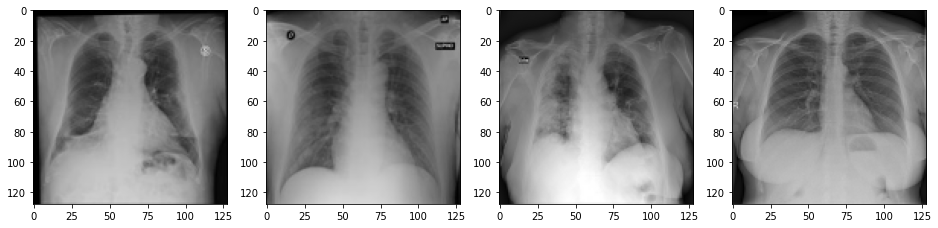

In [ ]:
fig, axes = plt.subplots(1, 4, figsize=(16, 4))
axes = axes.flatten()
for ax in axes:
    random_index = np.random.randint(0, data.shape[0])
    image = data[random_index]
    ax.imshow(image)

plt.show()

# Split Data

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(data, targets, test_size=0.30, random_state=42)
x_val, x_test, y_val, y_test = train_test_split(x_test, y_test, test_size=0.5, random_state=50)

In [ ]:
num_classes = len(np.unique(targets))
y_train = np.eye(num_classes)[y_train]
y_test = np.eye(num_classes)[y_test]
y_val = np.eye(num_classes)[y_val]

x_train = np.reshape(x_train, (-1, 128, 128, 3))
x_test = np.reshape(x_test, (-1, 128, 128, 3))
x_val = np.reshape(x_val, (-1, 128, 128, 3))

In [ ]:
num_classes

4

In [ ]:
del covidImages,covidTargets,covidUrl,covid_path,normalImages,normalTargets,normal_path,normal_urls,PneumoniaImages,PneumoniaTargets,Pneumonia_path,Pneumonia_urls,opacityImages,opacityTargets,opacity_path,opacity_urls

# ResNet50V2

In [ ]:
import tensorflow as tf

In [ ]:
from keras.layers import Conv2D, MaxPooling2D,GlobalAveragePooling2D,GlobalAveragePooling2D,Reshape
from keras.layers import Activation, Dropout, BatchNormalization, Flatten, Dense, AvgPool2D,MaxPool2D,Input
from keras.models import Model,Sequential
from keras.applications.inception_v3 import InceptionV3,preprocess_input
from keras.applications.vgg16 import VGG16
from keras.applications.vgg19 import VGG19
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import load_img, img_to_array
from tensorflow.keras.optimizers import Adam,SGD
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.losses import categorical_crossentropy
import math

In [ ]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.utils import shuffle
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from PIL import Image

In [ ]:
from tensorflow.keras.applications import ResNet50V2

In [ ]:
resnet_base_model = ResNet50V2(include_top=False, input_shape=(128, 128, 3),weights = 'imagenet', classes=4)

In [ ]:
for layer in resnet_base_model.layers:
    layer.trainable = False

In [ ]:
X = GlobalAveragePooling2D()(resnet_base_model.output)
X = Dense(1024,activation = 'relu')(X)
X = BatchNormalization()(X)
X = Dropout(0.5)(X)
X = Dense(4,activation = 'softmax')(X)

resnet_model = Model(resnet_base_model.input,X)
resnet_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

resnet_model.summary()

In [ ]:
model_checkpoint = ModelCheckpoint('/content/restnet_4class.h5',
                                                      save_best_only=True,
                                                      monitor='val_loss',
                                                      verbose=1)
early_stop = EarlyStopping(monitor='val_loss', patience=10)

In [ ]:
his_resnet = resnet_model.fit(x_train, y_train,batch_size=64,epochs=50,validation_data=(x_test, y_test),callbacks = [model_checkpoint])

In [ ]:
resnet_model = tf.keras.models.load_model("/content/restnet_4class.h5")

In [ ]:
test_loss, test_acc = resnet_model.evaluate(x_test, y_test)
print('Test accuracy: {:.4f}'.format(test_acc))
print('Loss accuracy: {:.4f}'.format(test_loss))

63/63 [==============================] - 4s 33ms/step - loss: 0.2442 - accuracy: 0.9127
Test accuracy: 0.9127
Loss accuracy: 0.2442


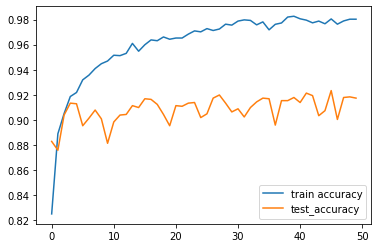

In [ ]:
plt.plot(his_resnet.history['accuracy'], label = 'train accuracy')
plt.plot(his_resnet.history['val_accuracy'],label = 'test_accuracy')
plt.legend()
plt.show()

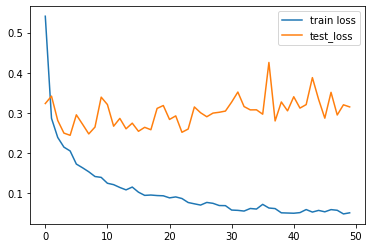

In [ ]:
plt.plot(his_resnet.history['loss'], label = 'train loss')
plt.plot(his_resnet.history['val_loss'],label = 'test_loss')
plt.legend()
plt.show()

63/63 [==============================] - 3s 31ms/step


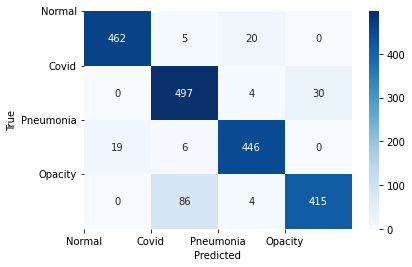

In [ ]:
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
import seaborn as sn
import pandas as pd

test_labels = np.argmax(y_test, axis=1)
predictions = resnet_model.predict(x_test)
predictions = np.argmax(predictions,axis=-1)
cm = confusion_matrix(test_labels,predictions)
ax = sn.heatmap(cm, annot=True, fmt='d', cmap='Blues')

# set the y-axis tick labels to be vertical
ax.set_yticklabels(ax.get_yticklabels(), rotation=0)

plt.xlabel('Predicted')
plt.ylabel('True')
plt.xticks(range(4), ['Normal','Covid','Pneumonia','Opacity'])
plt.yticks(range(4), ['Normal','Covid','Pneumonia','Opacity'])
plt.show()

In [ ]:
# Compute precision, recall, and F1 score for each class
report = classification_report(test_labels, predictions, digits=4, output_dict=True)

# Compute accuracy for each class
n_samples = np.sum(cm)
accuracy = np.array([cm[i][i] / np.sum(cm[i, :]) for i in range(cm.shape[0])])


class_count = ['Normal','Covid-19','Pneumonia','Opacity']

for i in range(cm.shape[0]):
    print(f"\n{class_count[i]}")
    print(f"Precision: {report[str(i)]['precision']:.4f}")
    print(f"Recall: {report[str(i)]['recall']:.4f}")
    print(f"F1 Score: {report[str(i)]['f1-score']:.4f}")
    print(f"Accuracy: {accuracy[i]:.4f}")


Normal
Precision: 0.9605
Recall: 0.9487
F1 Score: 0.9545
Accuracy: 0.9487

Covid-19
Precision: 0.8367
Recall: 0.9360
F1 Score: 0.8836
Accuracy: 0.9360

Pneumonia
Precision: 0.9409
Recall: 0.9469
F1 Score: 0.9439
Accuracy: 0.9469

Opacity
Precision: 0.9326
Recall: 0.8218
F1 Score: 0.8737
Accuracy: 0.8218


In [ ]:
from sklearn.metrics import f1_score, precision_score, recall_score

# y_true and y_pred are lists of true and predicted labels
y_true = test_labels
y_pred = predictions
f1 = f1_score(y_true, y_pred, average=None)
precision = precision_score(y_true, y_pred, average=None)
recall = recall_score(y_true, y_pred, average=None)

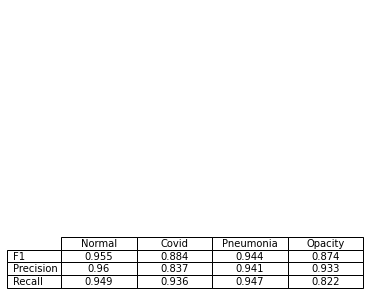

In [ ]:
import matplotlib.pyplot as plt

# Get the list of labels
labels = ['Normal','Covid','Pneumonia','Opacity']

# Round the scores to 3 decimal places
f1_rounded = [round(x, 3) for x in f1]
precision_rounded = [round(x, 3) for x in precision]
recall_rounded = [round(x, 3) for x in recall]

# Create a new figure and a table with the scores
plt.figure()
plt.table(cellText=[f1_rounded, precision_rounded, recall_rounded],
          rowLabels=['F1', 'Precision', 'Recall'],
          colLabels=labels,
          cellLoc='center')
plt.axis('off')

# Adjust the spacing around the table
plt.subplots_adjust(left=0.2, top=0.95, bottom=0.15)

# Show the table
plt.show()

In [ ]:
from google.colab import files
import pandas as pd
files.download('/content/restnet_4class.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### ResNet50V2 SGD Optimizer

In [ ]:
X = GlobalAveragePooling2D()(resnet_base_model.output)
X = Dense(1024,activation = 'relu')(X)
X = Dropout(0.5)(X)
X = Dense(4,activation = 'softmax')(X)

resnet_model = Model(resnet_base_model.input,X)
resnet_model.compile(optimizer=SGD(learning_rate = 0.001,momentum = 0.9), loss='categorical_crossentropy', metrics=['accuracy'])

resnet_model.summary()

In [ ]:
model_checkpoint = ModelCheckpoint('/content/restnet_SGD_4class.h5',
                                                      save_best_only=True,
                                                      monitor='val_loss',
                                                      verbose=1)
early_stop = EarlyStopping(monitor='val_loss', patience=10)

In [ ]:
his_resnet = resnet_model.fit(x_train, y_train,batch_size=64,epochs=50,validation_data=(x_test, y_test),callbacks = [model_checkpoint])

Epoch 1/50
146/146 [==============================] - ETA: 0s - loss: 0.6675 - accuracy: 0.7480
Epoch 1: val_loss improved from inf to 0.37838, saving model to /content/restnet_SGD_4class.h5
146/146 [==============================] - 19s 96ms/step - loss: 0.6675 - accuracy: 0.7480 - val_loss: 0.3784 - val_accuracy: 0.8450
Epoch 2/50
145/146 [============================>.] - ETA: 0s - loss: 0.4027 - accuracy: 0.8352
Epoch 2: val_loss improved from 0.37838 to 0.35125, saving model to /content/restnet_SGD_4class.h5
146/146 [==============================] - 11s 76ms/step - loss: 0.4034 - accuracy: 0.8351 - val_loss: 0.3513 - val_accuracy: 0.8611
Epoch 3/50
145/146 [============================>.] - ETA: 0s - loss: 0.3557 - accuracy: 0.8523
Epoch 3: val_loss improved from 0.35125 to 0.35035, saving model to /content/restnet_SGD_4class.h5
146/146 [==============================] - 11s 76ms/step - loss: 0.3556 - accuracy: 0.8520 - val_loss: 0.3503 - val_accuracy: 0.8631
Epoch 4/50
145/146 [

In [ ]:
resnet_model = tf.keras.models.load_model("/content/restnet_SGD_4class.h5")

In [ ]:
test_loss, test_acc = resnet_model.evaluate(x_test, y_test)
print('Test accuracy: {:.4f}'.format(test_acc))
print('Loss accuracy: {:.4f}'.format(test_loss))

63/63 [==============================] - 2s 36ms/step - loss: 0.2286 - accuracy: 0.9147
Test accuracy: 0.9147
Loss accuracy: 0.2286


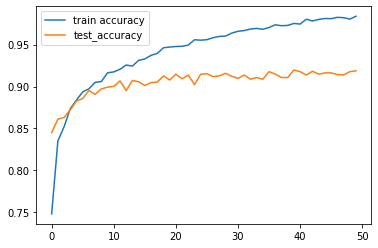

In [ ]:
plt.plot(his_resnet.history['accuracy'], label = 'train accuracy')
plt.plot(his_resnet.history['val_accuracy'],label = 'test_accuracy')
plt.legend()
plt.show()

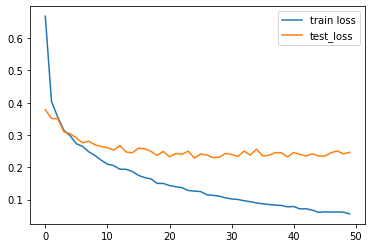

In [ ]:
plt.plot(his_resnet.history['loss'], label = 'train loss')
plt.plot(his_resnet.history['val_loss'],label = 'test_loss')
plt.legend()
plt.show()

63/63 [==============================] - 3s 32ms/step


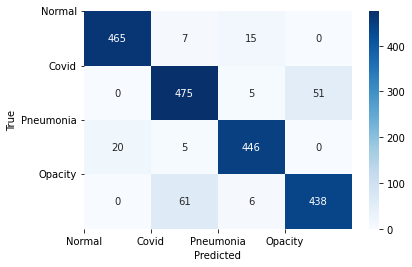

In [ ]:
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
import seaborn as sn
import pandas as pd

test_labels = np.argmax(y_test, axis=1)
predictions = resnet_model.predict(x_test)
predictions = np.argmax(predictions,axis=-1)
cm = confusion_matrix(test_labels,predictions)
ax = sn.heatmap(cm, annot=True, fmt='d', cmap='Blues')

# set the y-axis tick labels to be vertical
ax.set_yticklabels(ax.get_yticklabels(), rotation=0)

plt.xlabel('Predicted')
plt.ylabel('True')
plt.xticks(range(4), ['Normal','Covid','Pneumonia','Opacity'])
plt.yticks(range(4), ['Normal','Covid','Pneumonia','Opacity'])
plt.show()

In [ ]:
# Compute precision, recall, and F1 score for each class
report = classification_report(test_labels, predictions, digits=4, output_dict=True)

# Compute accuracy for each class
n_samples = np.sum(cm)
accuracy = np.array([cm[i][i] / np.sum(cm[i, :]) for i in range(cm.shape[0])])


class_count = ['Normal','Covid-19','Pneumonia','Opacity']

for i in range(cm.shape[0]):
    print(f"\n{class_count[i]}")
    print(f"Precision: {report[str(i)]['precision']:.4f}")
    print(f"Recall: {report[str(i)]['recall']:.4f}")
    print(f"F1 Score: {report[str(i)]['f1-score']:.4f}")
    print(f"Accuracy: {accuracy[i]:.4f}")


Normal
Precision: 0.9588
Recall: 0.9548
F1 Score: 0.9568
Accuracy: 0.9548

Covid-19
Precision: 0.8668
Recall: 0.8945
F1 Score: 0.8804
Accuracy: 0.8945

Pneumonia
Precision: 0.9449
Recall: 0.9469
F1 Score: 0.9459
Accuracy: 0.9469

Opacity
Precision: 0.8957
Recall: 0.8673
F1 Score: 0.8813
Accuracy: 0.8673


In [ ]:
from sklearn.metrics import f1_score, precision_score, recall_score

# y_true and y_pred are lists of true and predicted labels
y_true = test_labels
y_pred = predictions
f1 = f1_score(y_true, y_pred, average=None)
precision = precision_score(y_true, y_pred, average=None)
recall = recall_score(y_true, y_pred, average=None)

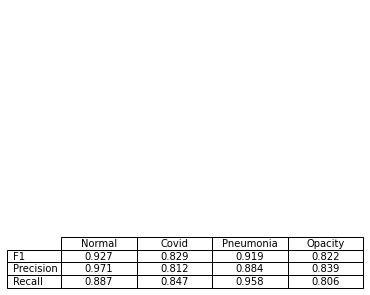

In [ ]:
import matplotlib.pyplot as plt

# Get the list of labels
labels = ['Normal','Covid','Pneumonia','Opacity']

# Round the scores to 3 decimal places
f1_rounded = [round(x, 3) for x in f1]
precision_rounded = [round(x, 3) for x in precision]
recall_rounded = [round(x, 3) for x in recall]

# Create a new figure and a table with the scores
plt.figure()
plt.table(cellText=[f1_rounded, precision_rounded, recall_rounded],
          rowLabels=['F1', 'Precision', 'Recall'],
          colLabels=labels,
          cellLoc='center')
plt.axis('off')

# Adjust the spacing around the table
plt.subplots_adjust(left=0.2, top=0.95, bottom=0.15)

# Show the table
plt.show()

In [ ]:
from google.colab import files
import pandas as pd
files.download('/content/restnet_SGD_4class.h5')